<div>
  <img style="float: left;"  width="140" src=" 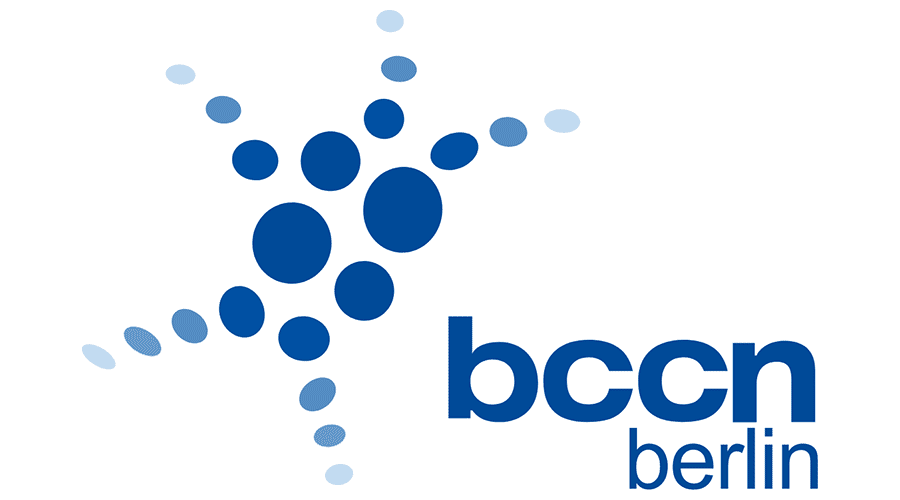">
</div>
 
<h1 id="course-title-heading">
    <div style="text-align: right">
        Models of Higher Brain Functions
        <br>Computer Course
        <br>
    </div>
</h1>
    
---
<div style="text-align: left; float: left">
    Lecturer: Prof. Dr. Henning Sprekeler
</div>

<div style="text-align: right">
    Assistant: Jarek Liesen
    <br>(jarek@bccn-berlin.de)
</div>



## General exercise instructions
These exercises should be completed entirely in this Jupyter Notebook (comprising source code, discussion and interpretation). Submission should be done through the Moodle interface and should consist only of this notebook (**a single `.ipynb` file**). This Jupyter Notebook was provided inside a `.zip` file, alongside additional files. Do not change the relative paths of these files when working on the assignment (meaning that e.g. `./helper.py` should always be in the same directory as this notebook).

Submission deadline is the start of the next lectue (**10:15 am on Fridays**).

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Some of the exercises will be automatically graded. Make sure that you:
1. Fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE"
2. Remove all `raise NotImplementedError` lines once you inserted your solution
3. Don't use variable names starting with underscore (e.g. `_myvar`) in your code, which could interfere with the automatic grading system.

Before you start, please fill in below your names and the name of your group as shown on Moodle. Example:
```
NAMES = ["Martina Musterfrau", "John Smith"]
GROUP = "A"
```

If you have any questions about the exercises, please ask them **on the Moodle forum** of the course.

In [ ]:
NAMES = ["", ""]
GROUP = ""

In [ ]:
# These are a few tests to make sure that your installed Python software is not too old
import sys
assert sys.version_info.major >= 3, "Your Python version is too old, please update it."

import IPython
assert IPython.version_info[0] >= 3, "Your IPython version is too old, please update it."

---

# Week 3: Saliency

<h2>Table of Contents<span class="tocSkip"></span></h2>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exercise-1:-Saliency-Maps-from-Local-Standard-Deviation-(20-points)" data-toc-modified-id="Exercise-1:-Saliency-Maps-from-Local-Standard-Deviation-(20-points)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercise 1: Saliency Maps from Local Standard Deviation (20 points)</a></span><ul class="toc-item"><li><span><a href="#1.1-Correlations-in-an-RGB-image" data-toc-modified-id="1.1-Correlations-in-an-RGB-image-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1.1 Correlations in an RGB image</a></span><ul class="toc-item"><li><span><a href="#1.1-a)-Plot-an-RGB-image-(1-point)" data-toc-modified-id="1.1-a)-Plot-an-RGB-image-(1-point)-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>1.1 a) Plot an RGB image (1 point)</a></span></li><li><span><a href="#1.1-b)-Compute-the-correlation-coefficients-in-an-RGB-image-(1-point)" data-toc-modified-id="1.1-b)-Compute-the-correlation-coefficients-in-an-RGB-image-(1-point)-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>1.1 b) Compute the correlation coefficients in an RGB image (1 point)</a></span></li><li><span><a href="#1.1-c)-What-do-you-observer?-(1-point)" data-toc-modified-id="1.1-c)-What-do-you-observer?-(1-point)-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>1.1 c) What do you observer? (1 point)</a></span></li></ul></li><li><span><a href="#1.2.-Correlations-in-HSV-image" data-toc-modified-id="1.2.-Correlations-in-HSV-image-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>1.2. Correlations in HSV image</a></span><ul class="toc-item"><li><span><a href="#1.2-a)-Plot-your-image-in-HSV-space-and-compute-the-channel-correlations-(2-point)" data-toc-modified-id="1.2-a)-Plot-your-image-in-HSV-space-and-compute-the-channel-correlations-(2-point)-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>1.2 a) Plot your image in HSV space and compute the channel correlations (2 point)</a></span></li><li><span><a href="#1.2-b)-What-do-you-observer?" data-toc-modified-id="1.2-b)-What-do-you-observer?-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>1.2 b) What do you observer?</a></span></li></ul></li><li><span><a href="#1.3-Compute-saliency-maps" data-toc-modified-id="1.3-Compute-saliency-maps-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>1.3 Compute saliency maps</a></span><ul class="toc-item"><li><span><a href="#1.3.-a)-Write-a-function-to-compute-saliency-maps" data-toc-modified-id="1.3.-a)-Write-a-function-to-compute-saliency-maps-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>1.3. a) Write a function to compute saliency maps</a></span></li><li><span><a href="#1.3-b)-Compute-and-plot-saliency-maps-for-the-HSV-channels-(1-point)" data-toc-modified-id="1.3-b)-Compute-and-plot-saliency-maps-for-the-HSV-channels-(1-point)-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>1.3 b) Compute and plot saliency maps for the HSV channels (1 point)</a></span></li><li><span><a href="#1.3-c)-What-do-you-observe?" data-toc-modified-id="1.3-c)-What-do-you-observe?-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>1.3 c) What do you observe?</a></span></li></ul></li><li><span><a href="#1.4-Combine-the-saliency-maps-(1-point)" data-toc-modified-id="1.4-Combine-the-saliency-maps-(1-point)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>1.4 Combine the saliency maps (1 point)</a></span></li><li><span><a href="#1.5-Use-a-Gaussian-filter-to-smooth-the-saliency-map-(1-point)" data-toc-modified-id="1.5-Use-a-Gaussian-filter-to-smooth-the-saliency-map-(1-point)-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>1.5 Use a Gaussian filter to smooth the saliency map (1 point)</a></span></li><li><span><a href="#1.6-Compare-your-saliency-map-with-the-original-image" data-toc-modified-id="1.6-Compare-your-saliency-map-with-the-original-image-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>1.6 Compare your saliency map with the original image</a></span><ul class="toc-item"><li><span><a href="#1.6-a)-Overlay-the-original-image-with-the-computed-saliency-contours-(3-point)" data-toc-modified-id="1.6-a)-Overlay-the-original-image-with-the-computed-saliency-contours-(3-point)-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>1.6 a) Overlay the original image with the computed saliency contours (3 point)</a></span></li><li><span><a href="#1.6-b)-What-do-you-observe?-(1-point)" data-toc-modified-id="1.6-b)-What-do-you-observe?-(1-point)-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>1.6 b) What do you observe? (1 point)</a></span></li></ul></li><li><span><a href="#1.7-How-well-does-the-proposed-saliency-algorithm-perform?" data-toc-modified-id="1.7-How-well-does-the-proposed-saliency-algorithm-perform?-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>1.7 How well does the proposed saliency algorithm perform?</a></span><ul class="toc-item"><li><span><a href="#1.7-a)-Compute-the-saliency-maps-for-all-provided-images-(1-point)" data-toc-modified-id="1.7-a)-Compute-the-saliency-maps-for-all-provided-images-(1-point)-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>1.7 a) Compute the saliency maps for all provided images (1 point)</a></span></li><li><span><a href="#1.7-b)-What-are-the-shortcoming-of-the-proposed-saliency-algorithm?-(2-points)" data-toc-modified-id="1.7-b)-What-are-the-shortcoming-of-the-proposed-saliency-algorithm?-(2-points)-1.7.2"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>1.7 b) What are the shortcoming of the proposed saliency algorithm? (2 points)</a></span></li><li><span><a href="#1.7-c)-How-could-you-improve-the-algorithm?-(1-point)" data-toc-modified-id="1.7-c)-How-could-you-improve-the-algorithm?-(1-point)-1.7.3"><span class="toc-item-num">1.7.3&nbsp;&nbsp;</span>1.7 c) How could you improve the algorithm? (1 point)</a></span></li></ul></li></ul></li><li><span><a href="#Exercise-2-(optional-bonus-task):-Mexican-hat-convolution-(5-points)" data-toc-modified-id="Exercise-2-(optional-bonus-task):-Mexican-hat-convolution-(5-points)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise 2 (optional bonus task): Mexican-hat convolution (5 points)</a></span></li></ul></div>

In [ ]:
# Necessary imports for this exercise, you can't modify these
import numpy as np
import matplotlib.pyplot as plt

# Import functions defined in the ./helpers.py file
from helpers import assert_var_defined

# Make sure the images folder is where it is supposed to be
try:
    _ = plt.imread("images/salience_01.png")
except FileNotFoundError as error:
    raise FileNotFoundError(
        "Don't change the relative path of the provided images!"
    ) from error

In [ ]:
# You can add your additional package imports here

# Create plots inline in the Jupyter notebook
%matplotlib inline

## Exercise 1: Saliency Maps from Local Standard Deviation (20 points)

In this exercise, we will compute saliency maps for natural images which provide an estimate of where subjects will (not) move their eyes. High values in a saliency map correspond to positions in an image which attract the viewer, and low values where they are unlikely to attend. We will program a purely bottom-up, i.e. physically driven and task-independent, saliency map, similar to the one proposed by [Itti, Koch \& Niebur (1998)](http://pages.cs.wisc.edu/~dyer/cs534/papers/itti98-saliency.pdf) (but excluding directional image information).

### 1.1 Correlations in an RGB image 
#### 1.1 a) Plot an RGB image (1 point)
Pick one of the provided [color images](./images) and import it as a 3D-array (`99x150x3` entries) using e.g. [`matplotlib.pyplot.imread`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html) or [`scipy.misc.imread`](https://docs.scipy.org/doc/scipy/reference/).
The third dimension represents the three colors red, green and blue.
Plot the color image as well as the three channels separately as a gray level image into a single figure (4 figure panels). Define a function for this plot, you will reuse it below.


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### 1.1 b) Compute the correlation coefficients in an RGB image (1 point)
You may notice that the information between the color channels is highly redundant.
To quantify the redundancy, compute the three pairwise correlation coefficients between each of the three color channels across all pixels. Complete the function `get_channel_correlations` below (hint: use the function [`flatten`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html) to convert each image channel into a 1D array and then apply [`numpy.corrcoef`](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) to obtain the correlation coefficients). Use this function to compute the channel correlation coefficients for the RGB image you imported.


In [ ]:
def get_channel_correlations(image):
    """
    Compute the pairwise correlation coefficients between each of the three image
    channels across all pixels.
    
    Parameters
    ----------
    image : numpy.ndarray
        A 3D array of shape `(num_pixels_x, num_pixels_y, 3)`, where the last dimension
        corresponds to the three image channels
    
    Returns
    -------
    channel_correlations : numpy.ndarray
        A 3x3 matrix of pairwise correlations coefficients
    """
    
    # YOUR CODE HERE
    raise NotImplementedError()

    return channel_correlations


# Compute and print the pairwise channel correlations for the RGB image you imported

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
""" Test that the function `get_channel_corrlelations` is defined """

assert_var_defined("get_channel_correlations", func=True)

#### 1.1 c) What do you observer? (1 point)
Is there anything striking in the correlations?
Why is this not surprising given the way natural images arise (hint: think about what determines the content of a photograph of a natural scene)?

YOUR ANSWER HERE

### 1.2. Correlations in HSV image
#### 1.2 a) Plot your image in HSV space and compute the channel correlations (1 point)
To decrease the interdependence between channels, convert the image from RGB- to HSV-space (hint: use the function [`matplotlib.colors.rgb_to_hsv`](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.rgb_to_hsv.html)).
Once more, plot the three channels separately as gray level images into a single figure together with the RGB color image.
To quantify whether the dependence has truly decreased, compute the pairwise correlation coefficients between the new HSV-channels. Use the functions you defined in exercise 1.1.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### 1.2 b) What do you observer? (2 points)
Explain why there is less correlation now! If you are not familiar with the HSV-representation, have a look at [Wikipedia: HSL and HSV](http://en.wikipedia.org/wiki/HSL_and_HSV).

YOUR ANSWER HERE

### 1.3 Compute saliency maps

We will now compute three independent saliency maps for the image using the HSV-representation. For each channel, we will compute the saliency at each pixel as the standard deviation across a surrounding patch of 15x15 pixels.

#### 1.3. a) Write a function to compute saliency maps (3 points)
Complete the function `compute_std_saliency_maps` below. It takes as input a an HSV image and should perform the following computations for each image channel separately:
1. For each pixel in the image, extract the surrounding $15\times 15$ pixel image patch. Ignore the edges of the image for which no full patches can be obtained.
2. For each patch compute the standard deviation of the pixel values. Note that the Hue-channel (but not the Saturation- or Value-channels) represents a circular variable ("color circle"), so that computing the ordinary standard deviation (the function [`numpy.std`](https://numpy.org/doc/stable/reference/generated/numpy.std.html)) may result in artifacts. Use circular standard deviation for the Hue-channel instead (hint: the function [`scipy.stats.circstd`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.circstd.html) is of help here, but be sure to set parameter `high=1`).
3. Store the standard deviation of the patches around each pixel in a new 2D "saliency image". Both dimensions should be 14 (patch size - 1) pixels smaller than in the original image.

In [ ]:
import scipy.stats

def compute_std_saliency_maps(hsv_image):
    """
    Compute the saliency map of each channel of an HSV image separately by calculating 
    the standard deviation across image patches of 15x15 pixels.

    Parameters
    ----------
    hsv_image : numpy.ndarray
        Image in HSV-space, with shape `(size_x, size_y, 3)`, where `size_x` and `size_y`
        are the number of pixels in x- and y-dimension, respectively and the last
        dimension corresponds to the hue, saturation and value channels.
    
    Returns
    -------
    saliency_maps : numpy.ndarray
        3D array of saliency values with shape `(size_x - 14, size_y - 14, 3)`
    """
    # YOUR CODE HERE
    raise NotImplementedError()
            
    return saliency_maps

In [ ]:
""" Test that the function `compute_std_saliency_maps` is defined """

assert_var_defined("compute_std_saliency_maps", func=True)

#### 1.3 b) Compute and plot saliency maps for the HSV channels (1 point)
Use `compute_std_saliency_map` to compute a saliency image for each channel of your HSV image. Plot the separate saliency images into a single figure.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### 1.3 c) What do you observe? (1 point)
How is each of the three saliency maps related to the visual properties of the original image?

YOUR ANSWER HERE

### 1.4 Combine the saliency maps (1 point)
Compute a joint saliency map by summing the separate saliency images you have computed.
This joint map represents the "attractiveness" of each position in the image when considering the information in all three image channels. Plot this joint saliency map.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### 1.5 Use a Gaussian filter to smooth the saliency map (1 point)
You will see that the combined saliency image still contains a lot of detail.
To generate a more naturally behaving saliency map, smooth this image by low-pass filtering (hint: you can use [`scipy.ndimage.gaussian_filter`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html). Experiment with different sigmas and padding modes). Plot the smoothed image.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### 1.6 Compare your saliency map with the original image

#### 1.6 a) Overlay the original image with the computed saliency contours (2 point)
1. Plot the original image and overlay the contours of the smoothed saliency map (hint: remember that the saliency map is smaller than the original image. Correct for this and then use the function [`matplotlib.pyplot.contour`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html) to plot the contour map upon the image).
2. From the smoothed saliency map, extract the positions the subject will most likely and least likely look at (hint: use [`numpy.argmax`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) and [`numpy.argmin`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html) in conjunction with [`numpy.unravel_index`](https://numpy.org/doc/stable/reference/generated/numpy.unravel_index.html) to locate the indices of those points within the image). Mark those points with a red and blue dot, respectively (hint: function [`matplotlib.pyplot.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) with `marker='o'` works well).

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### 1.6 b) What do you observe? (1 point)
How do you interpret the completed image?

YOUR ANSWER HERE

### 1.7 How well does the proposed saliency algorithm perform?

#### 1.7 a) Compute the saliency maps for all provided images (1 point)
Repeat the above procedures to plot a saliency map onto the complete set of color images provided (in the `images` folder).

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### 1.7 b) What are the shortcoming of the proposed saliency algorithm? (2 points)
Discuss possible shortcomings of the proposed saliency algorithm.
To this end, pick images for which the most salient position according to the algorithm does not conform with your expectation of how human attention works.
Name at least two different image features the algorithm does not take into account and illustrate each with a different image.

YOUR ANSWER HERE

#### 1.7 c) How could you improve the algorithm? (1 point)
We know from experiments that subjects are much more likely to first attend the center of an image, instead of the borders.
Please outline in words how this information could be included in the above saliency-map analysis to better predict eye-movements.

YOUR ANSWER HERE

---
## Exercise 2 (optional bonus task): Mexican-hat convolution (5 points)
In the above exercise, we used a shortcut to compute saliency by simply determining
the standard deviation on small image patches. A more advanced technique relies on a
2D-convolution of the separate image channels with a *mexican hat* filter as presented
during the lecture. If you are interested how this works in practice, you are invited to
do this optional exercise and score up to 5 bonus points. Essentially, this exercise corresponds to a different version of task 1.3, everything else should be performed in the same way as in exercise 1.

1. As a preparation for the following task, generate an array representing a *mexican hat* filter using the function `mexican_hat` (which is provided in [`helpers.py`](helpers.py)) with a size of 20x20 pixels and a width of 3. The filter returned from the helper function is its spatial-domain representation and need not be transformed.
2. For each image channel in your HSV image, repeat the following procedure: Convolve the image with the prepared *mexican hat* filter (hint: use [scipy.signal.convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)). Try out what happens with different boundary conditions and explain which one produces the best result. Choose the mode parameter appropriately to get a result that is the same size as the original image.
3. The resulting convolution image will have negative as well as positive values. Apply the absolute value function in order to obtain a positive saliency map for each channel.
4. Plot the three resulting saliency maps into a single figure, and also add the combined saliency map that you obtain by summation. In which aspects do the saliency maps obtained by convolution differ from the saliency maps that you obtained by computing standard deviation on image patches. Can you give an intuition why?
5. Perform the low-pass filtering and the analysis of attracting and repelling image positions as described in exercise 1. Plot the obtained saliency contours and computed image positions onto the original images and compare the resulting graphs with those of the previous exercise. Do you think that computing the standard deviation across patches is a valid shortcut? What is the disadvantage of using the convolution technique on HSV-represented images?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()